In [49]:
import numpy as np
import pandas as pd

# Per Capita

In [50]:
df = pd.read_csv('co-emissions-per-capita.csv')

In [51]:
df.head(3)

,Entity,Code,Year,Annual CO₂ emissions (per capita)
0,Afghanistan,AFG,1949,0.001992
1,Afghanistan,AFG,1950,0.011266
2,Afghanistan,AFG,1951,0.012098


In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
x = df[df["Entity"] == "India"]["Year"]
y = df[df["Entity"] == "India"]["Annual CO₂ emissions (per capita)"]


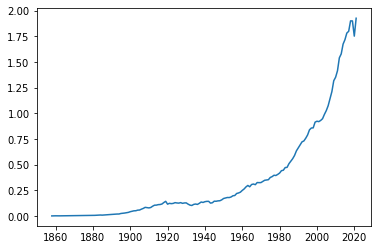

In [54]:
plt.plot(x, y)

In [55]:
df.sort_values(by =["Annual CO₂ emissions (per capita)"], ascending=False)

,Entity,Code,Year,Annual CO₂ emissions (per capita)
21568,Sint Maarten (Dutch part),SXM,1954,824.4568
21570,Sint Maarten (Dutch part),SXM,1956,787.5699
21565,Sint Maarten (Dutch part),SXM,1951,720.3904
21569,Sint Maarten (Dutch part),SXM,1955,645.0075
21573,Sint Maarten (Dutch part),SXM,1959,514.0120
...,...,...,...,...
4333,Cambodia,KHM,1833,0.0000
4332,Cambodia,KHM,1832,0.0000
4331,Cambodia,KHM,1831,0.0000
4330,Cambodia,KHM,1830,0.0000


In [56]:
df[df["Entity"] == "European Union (27)"]

,Entity,Code,Year,Annual CO₂ emissions (per capita)
8268,European Union (27),NaN,1800,0.009118
8269,European Union (27),NaN,1801,0.007378
8270,European Union (27),NaN,1802,0.072268
8271,European Union (27),NaN,1803,0.007426
8272,European Union (27),NaN,1804,0.026975
...,...,...,...,...
8485,European Union (27),NaN,2017,7.038307
8486,European Union (27),NaN,2018,6.862260
8487,European Union (27),NaN,2019,6.530877
8488,European Union (27),NaN,2020,5.887834


In [57]:
lst = ["India", "Canada", "United States", "China", "European Union (27)", "World", "UK", "Germany", "France", "Belgium", "Netherlands", "Portugal"]
df_I = df[df["Entity"].isin(lst)]
df_I.shape

(2125, 4)

In [58]:
df_I.tail(100)

,Entity,Code,Year,Annual CO₂ emissions (per capita)
26552,World,OWID_WRL,1922,1.683132
26553,World,OWID_WRL,1923,1.892938
26554,World,OWID_WRL,1924,1.881895
26555,World,OWID_WRL,1925,1.885378
26556,World,OWID_WRL,1926,1.835412
...,...,...,...,...
26647,World,OWID_WRL,2017,4.749682
26648,World,OWID_WRL,2018,4.792753
26649,World,OWID_WRL,2019,4.775633
26650,World,OWID_WRL,2020,4.497424


In [59]:
import altair as alt
from vega_datasets import data

source = df_I

lines = (
    alt.Chart(source)
    .mark_line()
    .encode(x='Year:Q', y='Annual CO₂ emissions (per capita)', color="Entity")
).properties(
    width=700, height = 500
)



lines

alt.Chart(...)

In [60]:

np.random.seed(42)

#source = source.reset_index().melt('x', var_name='category', value_name='y')
source = df_I

In [61]:
source

,Entity,Code,Year,Annual CO₂ emissions (per capita)
2815,Belgium,BEL,1802,1.957603
2816,Belgium,BEL,1830,1.652462
2817,Belgium,BEL,1831,1.180074
2818,Belgium,BEL,1832,1.236363
2819,Belgium,BEL,1833,1.186923
...,...,...,...,...
26647,World,OWID_WRL,2017,4.749682
26648,World,OWID_WRL,2018,4.792753
26649,World,OWID_WRL,2019,4.775633
26650,World,OWID_WRL,2020,4.497424


In [62]:

source = df_I


line = alt.Chart(source).mark_line(interpolate='basis').encode(
    x = alt.X('Year:O', axis=alt.Axis(labelOverlap = True,labelSeparation = 1)),
    y = alt.Y('Annual CO₂ emissions (per capita)', axis = alt.Axis(title='Annual CO₂ emissions per capita(in Tonnes)') ), 
    color="Entity").properties(width = 800, height = 600)


In [63]:
line

alt.Chart(...)

In [64]:

# Create a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection_point(nearest=True, on='mouseover',
                        fields=['Year'], empty=False)

# The basic line



base = alt.Chart(source).encode(
    alt.Color("Entity:N").legend(None)
).properties(
    width=800, height = 700
)

line = base.mark_line().encode(x="Year:O", y="Annual CO₂ emissions (per capita)")


last_val = base.mark_circle().encode(
    alt.X("last_year['Year']:O", axis=alt.Axis(labelOverlap = True,labelSeparation = 1)),
    alt.Y("last_year['Annual CO₂ emissions (per capita)']:Q").scale(domain=(0, 25), clamp = True)
).transform_aggregate(
    last_year="argmax(Year)",
    groupby=["Entity"]
)

entity_name = last_val.mark_text(align="left", dx=4).encode(text="Entity")


chart = (line + last_val + entity_name).encode(
    x=alt.X().title("Year"),
    y=alt.Y().title("Annual CO₂ emissions (per capita)")
)




# Transparent selectors across the chart. This is what tells us
# the x-value of the cursor
selectors = alt.Chart(source).mark_point().encode(
    x='Year:O',
    opacity=alt.value(0),
).add_params(
    nearest
)

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'Annual CO₂ emissions (per capita):Q', alt.value(' '))
)

# Draw a rule at the location of the selection
rules = alt.Chart(source).mark_rule(color='gray').encode(
    x='Year:O',
).transform_filter(
    nearest
)

# Put the five layers into a chart and bind the data
alt.layer(
    chart, selectors, points, rules, text
).properties(
    width=800, height=800
)

alt.LayerChart(...)

# By Region

In [65]:
df = pd.read_csv('annual-co-emissions-by-region.csv')

In [66]:
df.head(10)

,Entity,Code,Year,Annual CO₂ emissions
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0
5,Afghanistan,AFG,1954,106256.0
6,Afghanistan,AFG,1955,153888.0
7,Afghanistan,AFG,1956,183200.0
8,Afghanistan,AFG,1957,293120.0
9,Afghanistan,AFG,1958,329760.0


In [67]:
df[df["Entity"] == "World" ]

,Entity,Code,Year,Annual CO₂ emissions
30814,World,OWID_WRL,1750,9.350528e+06
30815,World,OWID_WRL,1751,9.350528e+06
30816,World,OWID_WRL,1752,9.354192e+06
30817,World,OWID_WRL,1753,9.354192e+06
30818,World,OWID_WRL,1754,9.357856e+06
...,...,...,...,...
31081,World,OWID_WRL,2017,3.609674e+10
31082,World,OWID_WRL,2018,3.682651e+10
31083,World,OWID_WRL,2019,3.708256e+10
31084,World,OWID_WRL,2020,3.526409e+10


In [68]:
lst = ["India", "International transport", "United States", "China", "South America" "Asia (excl. China and India)",
       "North America (excl. USA)", "European Union (27)", "World", "Oceania", "Africa", "Europe (excl.EU-27)" ]
lst = ["India", "International transport", "United States", "China", "European Union (27)", "World"]


df_I = df[df["Entity"].isin(lst)]
df_I.shape

(1070, 4)

In [69]:
df_I

,Entity,Code,Year,Annual CO₂ emissions
6054,China,CHN,1899,0.000000e+00
6055,China,CHN,1902,0.000000e+00
6056,China,CHN,1903,0.000000e+00
6057,China,CHN,1904,0.000000e+00
6058,China,CHN,1905,0.000000e+00
...,...,...,...,...
31081,World,OWID_WRL,2017,3.609674e+10
31082,World,OWID_WRL,2018,3.682651e+10
31083,World,OWID_WRL,2019,3.708256e+10
31084,World,OWID_WRL,2020,3.526409e+10


In [70]:

source = df_I

base = alt.Chart(source).mark_area(opacity = 0.3).encode(
    x = alt.X('Year:O', axis=alt.Axis(labelOverlap = True,labelSeparation = 1)),
    y = alt.Y("Annual CO₂ emissions", axis = alt.Axis(title='Annual CO₂ emissions(in Tonnes)',labelExpr='datum.value / 1E9 + "B"')).stack(None),
    color="Entity:N"
).properties(width=800, height=600)

base

alt.Chart(...)

# Annual CO2 emmissions

In [71]:
df = pd.read_csv('2021co2sharepercountry.csv')

In [72]:
df['Share of global annual CO₂ emissions_1'] = df["Share of global annual CO₂ emissions"].apply(lambda x: round(x, 2))

In [73]:
df.head(5)

,Entity,Code,Year,Share of global annual CO₂ emissions,Origin,Unnamed: 5,Unnamed: 6,Share of global annual CO₂ emissions_1
0,China,CHN,2021,30.902962,Asia,NaN,NaN,30.90
1,United States,USA,2021,13.488192,North America,NaN,NaN,13.49
2,European Union (28),NaN,2021,8.457607,Europe,NaN,NaN,8.46
3,India,IND,2021,7.299037,Asia,NaN,NaN,7.30
4,Russia,RUS,2021,4.728894,Europe,NaN,NaN,4.73


In [83]:
df.shape

(93, 8)

In [75]:
df = df.drop(df.index[[2]])

In [76]:
df["Origin"].unique()

array(['Asia', 'North America', 'Europe', 'South America', 'Africa',
       'Oceania'], dtype=object)

In [82]:
df[df["Entity"] == "Egypt"]

,Entity,Code,Year,Share of global annual CO₂ emissions,Origin,Unnamed: 5,Unnamed: 6,Share of global annual CO₂ emissions_1
26,Egypt,EGY,2021,0.672409,Africa,NaN,NaN,0.67


In [81]:
df.loc[df['Entity']=="Egypt", ['Origin']] = 'Africa'

In [78]:
df[df["Origin"] == "Europe"]["Share of global annual CO₂ emissions"].sum()

15.365529743000002

In [84]:
import plotly.express as px
import numpy as np

from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *

init_notebook_mode(connected=True)         
fig = px.treemap(df, path=[px.Constant("Carbon dioxide emission over the world(in percent)"),'Origin', 'Entity'], 
                 values='Share of global annual CO₂ emissions_1'
                 )
fig.data[0].textinfo = 'label+text+value'
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

# Historical Emissions

In [31]:
df = pd.read_csv('cumulative-co-emissions.csv')
df.head(2)

,Entity,Code,Year,Cumulative CO₂ emissions
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,98928.0


In [32]:
df[df["Entity"] == "Europe (excl. EU-27)"]

,Entity,Code,Year,Cumulative CO₂ emissions
8338,Europe (excl. EU-27),NaN,1750,9.350528e+06
8339,Europe (excl. EU-27),NaN,1751,1.870106e+07
8340,Europe (excl. EU-27),NaN,1752,2.805525e+07
8341,Europe (excl. EU-27),NaN,1753,3.740944e+07
8342,Europe (excl. EU-27),NaN,1754,4.676730e+07
...,...,...,...,...
8605,Europe (excl. EU-27),NaN,2017,2.340753e+11
8606,Europe (excl. EU-27),NaN,2018,2.366300e+11
8607,Europe (excl. EU-27),NaN,2019,2.391502e+11
8608,Europe (excl. EU-27),NaN,2020,2.415394e+11


In [33]:
lst = ["India", "Europe (excl. EU-27)", "Africa", "Oceania",
       "North America (excl. USA)", "South America", "United States", "China", 
       "European Union (27)", "Asia (excl. China and India)"]


df_I = df[df["Entity"].isin(lst)]
df_I.shape

(2358, 4)

In [34]:

source = df_I

base = alt.Chart(source).transform_calculate(
    order="{'Europe (excl. EU-27)':2, 'European Union (27)':1, 'United States': 3, 'China': 4,'Asia (excl. China and India)': 5, 'India': 6 }[datum.variable]"  
).mark_area().encode(
    x = alt.X('Year:O', axis=alt.Axis(labelOverlap = True,labelSeparation = 1)),
    y = alt.Y("Cumulative CO₂ emissions", axis = alt.Axis()).stack('normalize'),
    color=alt.Color("Entity:N", sort=alt.SortField("order", "descending")),
    order="order:O"
    #color="Entity:N"
).properties(width=800, height=600)

base

alt.Chart(...)

# Cumulative emissions

In [35]:
df = pd.read_csv('cumulative-co-emissions.csv')
df.head(4)

,Entity,Code,Year,Cumulative CO₂ emissions
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,98928.0
2,Afghanistan,AFG,1951,190528.0
3,Afghanistan,AFG,1952,282128.0


In [36]:
lst = ["India", "Canada", "United States", "China", "European Union (27)", "United Kingdom", "Brazil" ]
df_I = df[df["Entity"].isin(lst)]
df_I.shape

(1356, 4)

In [37]:
source = df_I
# Create a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection_point(nearest=True, on='mouseover',
                        fields=['Year'], empty=False)

# The basic line
line = alt.Chart(source).mark_trail(interpolate='basis').encode(
    x = alt.X('Year:O', axis=alt.Axis(labelOverlap = True,labelSeparation = 1)),
    y = alt.Y('Cumulative CO₂ emissions', axis = alt.Axis(title='Cumulative CO₂ emissions(in Tonnes)', labelExpr='datum.value / 1E9 + "B"')), 
    color="Entity",
    size='Cumulative CO₂ emissions:Q'
)
    


# Transparent selectors across the chart. This is what tells us
# the x-value of the cursor
selectors = alt.Chart(source).mark_point().encode(
    x='Year:O',
    opacity=alt.value(0),
).add_params(
    nearest
)

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'Cumulative CO₂ emissions:Q', alt.value(' '))
)

# Draw a rule at the location of the selection
rules = alt.Chart(source).mark_rule(color='gray').encode(
    x='Year:O',
).transform_filter(
    nearest
)

# Put the five layers into a chart and bind the data
alt.layer(
    line, selectors, points, rules, text
).properties(
    width=800, height=700
)

alt.LayerChart(...)

# How has each country’s share of global cumulative CO2 emissions changed over time?


In [38]:
df = pd.read_csv("share-of-cumulative-co2.csv")
df.head(4)

,Entity,Code,Year,Share of global cumulative CO₂ emissions
0,Afghanistan,AFG,1949,0.000007
1,Afghanistan,AFG,1950,0.000043
2,Afghanistan,AFG,1951,0.000080
3,Afghanistan,AFG,1952,0.000116


In [39]:
lst = ["India", "Canada", "United States", "China", "European Union (27)", "United Kingdom", "Russia" ]
df_I = df[df["Entity"].isin(lst)]
df_I.shape

(1405, 4)

In [40]:

source = df_I

base = alt.Chart(source).mark_line().encode(
    x = alt.X('Year:O', axis=alt.Axis(labelOverlap = True,labelSeparation = 1)),
    y = alt.Y("Share of global cumulative CO₂ emissions", 
              axis = alt.Axis(title='Share of global cumulative CO₂ emissions'), scale=alt.Scale(domain=[0, 100])),
    color="Entity:N"
).properties(width=800, height=600)

base

alt.Chart(...)

In [41]:

source = df_I

base = alt.Chart(source).encode(
    alt.Color("Entity:N").legend(None)
).properties(
    width=800, height = 700
)

line = base.mark_line().encode(x="Year:O", y="Share of global cumulative CO₂ emissions")


last_val = base.mark_circle().encode(
    alt.X("last_year['Year']:O", axis=alt.Axis(labelOverlap = True,labelSeparation = 1)),
    alt.Y("last_year['Share of global cumulative CO₂ emissions']:Q", scale=alt.Scale(domain=[0, 100]))
).transform_aggregate(
    last_year="argmax(Year)",
    groupby=["Entity"]
)

entity_name = last_val.mark_text(align="left", dx=4).encode(text="Entity")


chart = (line + last_val + entity_name).encode(
    x=alt.X().title("Year"),
    y=alt.Y().title("Share of global cumulative CO₂ emissions")
)

chart


alt.LayerChart(...)

# Temperature Anomaly

In [42]:
df = pd.read_csv('temperature-anomaly.csv')
df.head(4)

,Entity,Code,Year,Global average temperature anomaly relative to 1961-1990,Upper bound (95% confidence interval) of the annual temperature anomaly,Lower bound (95% confidence interval) of the annual temperature anomaly
0,Global,NaN,1850,-0.417659,-0.246115,-0.589203
1,Global,NaN,1851,-0.233350,-0.054832,-0.411868
2,Global,NaN,1852,-0.229399,-0.049416,-0.409382
3,Global,NaN,1853,-0.270354,-0.110700,-0.430009


In [43]:
source = df


lines = (
    alt.Chart(source)
    .mark_line()
    .encode(x = alt.X('Year:O', axis=alt.Axis(labelOverlap = True,labelSeparation = 1)), 
            y='Global average temperature anomaly relative to 1961-1990', 
            color="Entity")
).properties(
    width=700, height = 500
)


lines

alt.Chart(...)

In [44]:
source = df[df["Entity"] == "Global"]

base = alt.Chart(source).encode(x = alt.X('Year:O', axis=alt.Axis(labelOverlap = True,labelSeparation = 1)))


In [45]:
                                          
base1 = base.mark_line(color='red').encode(y= alt.Y('Global average temperature anomaly relative to 1961-1990',
                                                   axis = alt.Axis(title='Average temperature anomaly, Global')),
                                          )  
base2 = base.mark_line(color='grey').encode(y='Upper bound (95% confidence interval) of the annual temperature anomaly')
base3 = base.mark_line(color='grey').encode(y='Lower bound (95% confidence interval) of the annual temperature anomaly')
                                          
                                          

alt.layer(base1, base2, base3
).properties(
    width=800, height = 500, title='Global temperature anomaly with upper and lower bounds 95% confidence interval , Global'
)



alt.LayerChart(...)